In [1]:
# import packages
from googleapiclient.discovery import build
# import pandas as pd
from IPython.display import JSON

from datetime import datetime

# data viz packages
import seaborn as sns
import matplotlib.pyplot as plt

# import user defined functions
from all_functions import *

## Get api key

In [2]:
with open('api_key.txt') as fread:
    api_key = fread.read()

In [3]:
#!pip install --upgrade google-api-python-client

In [4]:
channel_ids = [#'UC_x5XG1OV2P6uZZ5FSM9Ttw', #Google Developers
               'UCbXgNpp0jedKWcQiULLbDTA', #Python Engineer
               'UCNU_lfiiWBdtULKOw6X0Dig', #Krish Naik
               'UCtYLUTtgS3k1Fg4y5tAhLbw', #StatQuest with Josh Starmer
]

In [5]:
api_service_name = "youtube"
api_version = "v3"

# Get credentials and create an API client
youtube = build(
    api_service_name, api_version, developerKey=api_key)

### Get playlist Ids

In [6]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [7]:
channel_stats

,channelName,subscribers,views,totalVids,playlistId
0,StatQuest with Josh Starmer,822000,42437543,225,UUtYLUTtgS3k1Fg4y5tAhLbw
1,Python Engineer,199000,13918092,191,UUbXgNpp0jedKWcQiULLbDTA
2,Krish Naik,674000,64045923,1519,UUNU_lfiiWBdtULKOw6X0Dig


### Get Video Ids

In [8]:
playlist_id = 'UUbXgNpp0jedKWcQiULLbDTA'  # Python Engineer

In [9]:
vid_ids = get_vid_ids(youtube, playlist_id)

In [10]:
len(vid_ids)

191

### Get Video details

In [11]:

request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        id=vid_ids[:5]
    )
response = request.execute()

JSON(response)


<IPython.core.display.JSON object>

In [12]:
# final data frame
vid_df =get_vid_Details(youtube, vid_ids)
len(vid_df)

191

In [13]:
vid_df.head()

,vid_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,VZEgu1buycI,Python Engineer,Python 3.11 is out! All new features,Python 3.11 is out! All new features\n\nAll ch...,[Python],2022-10-24T20:22:11Z,23124,1215,None,51,PT3M38S,hd,false
1,RxCRdmW6S_I,Python Engineer,How to print emojis in Python (3 options),How to print emojis in Python (3 options)\n\nF...,[Python],2022-10-14T13:30:06Z,20676,1233,None,14,PT35S,hd,false
2,USUL35RtwO4,Python Engineer,How to implement custom String Formatting in P...,How to implement custom String Formatting in P...,[Python],2022-10-01T12:00:15Z,12208,912,None,19,PT47S,hd,false
3,I5eP5qZPnNc,Python Engineer,Python Interactive mode is really helpful!,Python Interactive mode is really helpful!\n\n...,[Python],2022-09-24T12:00:17Z,11563,777,None,14,PT26S,hd,false
4,BZ6AWXJWRxI,Python Engineer,Why dataclasses in Python are awesome!,Learn why dataclasses in Python are awesome an...,[Python],2022-09-17T12:00:09Z,120684,8664,None,99,PT45S,hd,false


In [14]:
vid_df.shape

(191, 13)

### Get comments on videos

In [15]:

request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="IDgDWDpwvIc"
    )
response = request.execute()

JSON(response)


<IPython.core.display.JSON object>

In [16]:
comment_df = get_comments_in_videos(youtube, vid_ids)

In [17]:
comment_df

,vid_id,comment
0,VZEgu1buycI,[Have never upgraded python before. Is pip ins...
1,RxCRdmW6S_I,"[🦕, I like to download a copy of the NamesList..."
2,USUL35RtwO4,[hey patrick in reza i had serious problem in ...
3,I5eP5qZPnNc,"[Cool tip!, Seems like the jupyter notebook us..."
4,BZ6AWXJWRxI,[That will be awesome if you make a loong tuto...
...,...,...
186,e6ivlABOYRI,"[Good stuff, thank you, 14:50, hey. if strings..."
187,Qs3BSFZnZSI,"[You can also use ""|"" to update 2 sets\n\n\nco..."
188,LTXnQdrwyrw,[So when I use popitem() it returns me the key...
189,Kes8YRV73Io,[Fonts so small that it cannot be seen on cell...


Analysis ideas
- Average views per video
- does no. of likes and comments matter for views?
- does title length matter for views?
- average length of videos?
- what are the tags used? which tag is most used?
- how often the videos are uploaded?

In [18]:
# vid_df.to_csv("vid_df.csv", index=False)

## Video titles

Let's analyse the video titles

In [21]:
all_titles = ' '.join(list(vid_df['title'].values))

In [26]:
#!pip install wordcloud

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [45]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(all_titles)

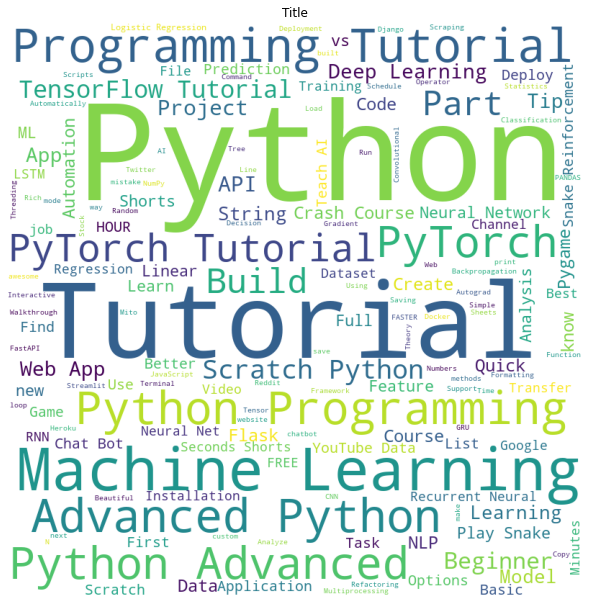

In [46]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Title")
 
plt.show()

Similarly for tags

In [39]:
all_tags = []
for i in range(len(vid_df)):
    if vid_df.loc[i,'tags']:
        all_tags.extend(vid_df.loc[i,'tags'])

In [41]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(' '.join(all_tags))

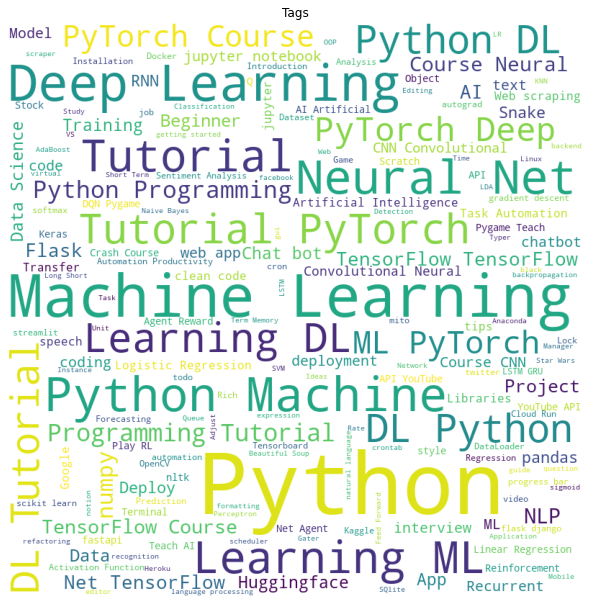

In [43]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Tags")
 
plt.show()

**Check if no. of tags affect views**

In [51]:
tags = vid_df.loc[:,['tags','viewCount']]
tags['count_tags'] = tags['tags'].apply(lambda x: len(x) if x else 0)
tags.head()

,tags,viewCount,count_tags
0,[Python],23124,1
1,[Python],20676,1
2,[Python],12208,1
3,[Python],11563,1
4,[Python],120684,1


In [54]:
tags.count_tags.describe()

count    191.000000
mean       6.617801
std        5.721198
min        0.000000
25%        1.000000
50%        5.000000
75%       11.000000
max       24.000000
Name: count_tags, dtype: float64

<AxesSubplot:>

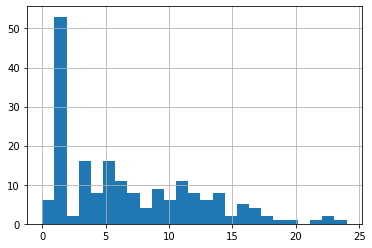

In [66]:
tags.count_tags.hist(bins=25)

<AxesSubplot:xlabel='count_tags', ylabel='viewCount'>

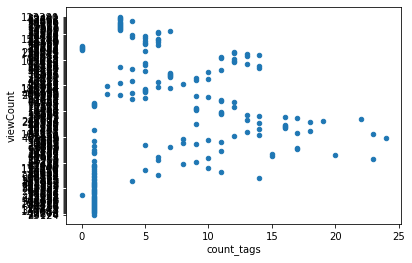

In [67]:
tags.plot.scatter('count_tags','viewCount')

**Conclusion:**
Obviously no. of tags have no clear relationsship with view count. Preferably around 5 tags are enough for more no. of views.